<a href="https://colab.research.google.com/github/Raulespz/cross_validation/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, seaborn as sns
import pandas as pd
import numpy as np
#from colorsetup import colors, palette
#sns.set_palette(palette)

In [ ]:
data = pd.read_csv("/content/Human_Activity_Recognition_Using_Smartphones_Data.csv")
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [ ]:
x = data
y

In [ ]:
data.shape

(151, 562)

In [ ]:
data.dtypes

tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
                                         ...   
angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
Length: 562, dtype: object

In [ ]:
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [ ]:
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

In [ ]:
data.iloc[:, :-1].min().value_counts()

-1.000000    40
-0.999504     4
-1.000000     3
-0.999112     2
-0.999479     2
             ..
-0.644293     1
-0.794291     1
-0.991772     1
-0.885549     1
-0.980143     1
Length: 496, dtype: int64

In [ ]:
data.iloc[:, :-1].max().value_counts()

 1.000000    4
 0.294839    4
 0.650767    2
 0.307882    2
-0.180174    2
            ..
 0.124718    1
 0.088936    1
 0.032797    1
-0.034007    1
 0.058288    1
Length: 537, dtype: int64

In [ ]:
data.Activity.value_counts()

##The results you provided seem to be the value counts for a column named "Activity" in a dataset. Here's what it means:

# WALKING: There are 95 occurrences of the value "WALKING" in the "Activity" column.
# STANDING: There are 53 occurrences of the value "STANDING" in the "Activity" column.
# LAYING: There are 50 occurrences of the value "LAYING" in the "Activity" column.
# SITTING: There are 47 occurrences of the value "SITTING" in the "Activity" column.
# WALKING_DOWNSTAIRS: There are 32 occurrences of the value "WALKING_DOWNSTAIRS" in the "Activity" column.
# WALKING_UPSTAIRS: There are 26 occurrences of the value "WALKING_UPSTAIRS" in the "Activity" column.

3    47
2    27
0    27
4    25
1    24
5     1
Name: Activity, dtype: int64

In [ ]:
# The LabelEncoder class from sklearn.preprocessing in scikit-learn is a utility
# class that is used for encoding categorical labels into numerical values.
# It is commonly used when working with machine learning models that require numeric inputs.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(5)

24     2
278    3
203    1
257    3
153    5
Name: Activity, dtype: int64

In [ ]:
# QUESTION 2
# - Calculate the correlations between the independent variables.
# - Create a histogram of the corerelation values.
# - Identify those that are most correlated either positive or negative.

In [ ]:
#Calculate the correlation values:
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()
corr_values

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,1.000000,0.332123,-0.195672,0.038692,-0.065600,-0.141474,0.041825,-0.069526,-0.141305,0.118135,...,0.355198,-0.203566,-0.193665,-0.397199,-0.021267,0.108080,0.019719,-0.232660,0.228698,0.172439
tBodyAcc-mean()-Y,0.332123,1.000000,-0.368367,-0.005154,-0.117839,-0.077141,-0.002682,-0.123475,-0.067216,0.036299,...,0.145152,-0.022778,0.011764,0.029250,-0.069564,-0.001449,-0.014184,-0.203475,0.065812,0.188142
tBodyAcc-mean()-Z,-0.195672,-0.368367,1.000000,0.010669,0.087481,0.003723,0.007993,0.099424,-0.003174,-0.018188,...,-0.112920,0.059590,0.068157,0.081145,-0.070003,-0.048943,-0.040461,0.011615,0.078150,-0.145998
tBodyAcc-std()-X,0.038692,-0.005154,0.010669,1.000000,0.917337,0.902832,0.999034,0.906404,0.896166,0.983428,...,-0.196516,0.282560,0.213529,0.013589,0.024161,0.008072,-0.028852,-0.426408,0.513036,0.501440
tBodyAcc-std()-Y,-0.065600,-0.117839,0.087481,0.917337,1.000000,0.931299,0.912036,0.997937,0.923721,0.884421,...,-0.274757,0.412294,0.347736,0.028053,-0.009061,-0.004730,-0.003362,-0.380110,0.518720,0.454437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",0.108080,-0.001449,-0.048943,0.008072,-0.004730,-0.027171,0.006891,-0.013055,-0.030526,0.016639,...,0.049039,-0.067726,-0.065880,-0.100342,0.099000,1.000000,-0.139818,0.003840,-0.009718,-0.038273
"angle(tBodyGyroJerkMean,gravityMean)",0.019719,-0.014184,-0.040461,-0.028852,-0.003362,0.008301,-0.023355,-0.001494,0.007723,-0.050406,...,-0.000262,0.015857,-0.001230,-0.101098,-0.027216,-0.139818,1.000000,0.091594,-0.086386,-0.073200
"angle(X,gravityMean)",-0.232660,-0.203475,0.011615,-0.426408,-0.380110,-0.336798,-0.424358,-0.376247,-0.333972,-0.449752,...,-0.068360,-0.108006,-0.094373,-0.006034,-0.004441,0.003840,0.091594,1.000000,-0.839777,-0.690134
"angle(Y,gravityMean)",0.228698,0.065812,0.078150,0.513036,0.518720,0.445607,0.508099,0.519728,0.442965,0.534340,...,0.052043,0.147291,0.125760,0.016519,-0.014802,-0.009718,-0.086386,-0.839777,1.000000,0.514669


In [ ]:
#Simplify by emptying all the data bellow the diagonal
tril_index = np.tril_indices_from(corr_values)
tril_index

(array([  0,   1,   1, ..., 560, 560, 560]),
 array([  0,   0,   1, ..., 558, 559, 560]))

In [ ]:
# Make the unused values NaNs
corr_array = np.array(corr_values)
corr_array[np.tril_indices_from(corr_values)] = np.nan

# Recreate correlation pandas dataframe
corr_values = pd.DataFrame(corr_array, columns = corr_values.columns, index = corr_values.index)

# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

#Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

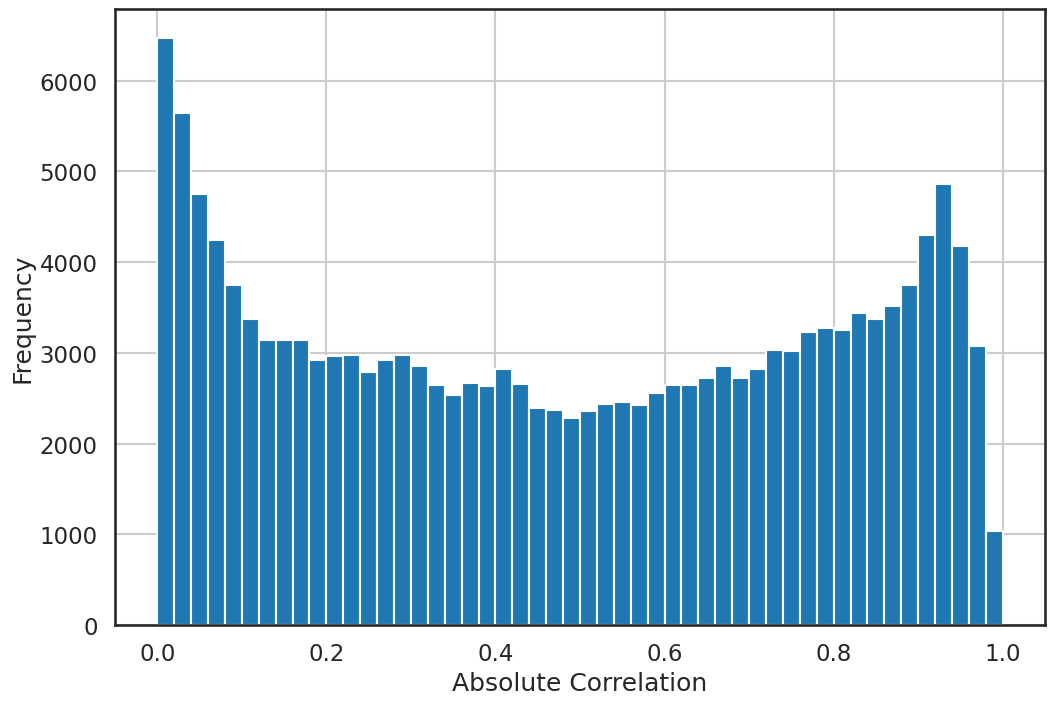

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [ ]:
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation
105403,tBodyGyroMag-mean(),tBodyGyroMag-sma(),1.000000,1.000000
94611,tBodyAccMag-iqr(),tGravityAccMag-iqr(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
93189,tBodyAccMag-max(),tGravityAccMag-max(),1.000000,1.000000
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
...,...,...,...,...
22137,tGravityAcc-mean()-X,"angle(X,gravityMean)",-0.994909,0.994909
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.995960,0.995960
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.999055,0.999055
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.999138,0.999138


In [ ]:
corr_values.shape

(157080, 4)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
#n_splits is the number of train and test in this case one train and one tests if we wanto to encrease put more
strat_shuf_split = StratifiedShuffleSplit(n_splits=1,
                                          test_size=0.3,
                                          random_state=42)

next(strat_shuf_split.split(data[feature_cols], data.Activity))

ValueError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets while ensuring at least two instances per class in each set
x_train, x_test, y_train, y_test = train_test_split(data[feature_cols], data['Activity'], test_size=0.3, stratify=data['Activity'], random_state=42)

# Check if any class has only one instance in the test set
unique_classes = set(y_test)
single_instance_classes = [c for c in unique_classes if y_test.tolist().count(c) == 1]

# Handle classes with a single instance in the test set
for c in single_instance_classes:
    # Find the index of the single instance
    single_idx = y_test[y_test == c].index[0]

    # Move the instance from the test set to the training set
    x_train = x_train.append(x_test.loc[single_idx])
    y_train = y_train.append(y_test.loc[single_idx])

    # Remove the instance from the test set
    x_test = x_test.drop(single_idx)
    y_test = y_test.drop(single_idx)

In [ ]:
from sklearn.model_selection import train_test_split

skf = StratifiedKFold(n_splits=1, shuffle=True, random_state=42)

for train_idx, test_idx in skf.split(data[feature_cols], data.Activity):
    x_train = data.loc[train_idx, feature_cols]
    y_train = data.loc[train_idx, 'Activity']
    x_test = data.loc[test_idx, feature_cols]
    y_test = data.loc[test_idx, 'Activity']

#Create the dataframes
#x_train = data.loc[train_idx, feature_cols]
#y_train = data.loc[train_idx, 'Activity']

#x_test = data.loc[test_idx, feature_cols]
#y_test = data.loc[test_idx, 'Activity']

In [ ]:
y_train.value_counts(normalize=True)

In [ ]:
y_test.value_counts(normalize=True)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear').fit(x_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(x_train, y_train) # Cs=10, cv=4, penalty='l1', solver='liblinear' these are the hyperparameters

In [ ]:

lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(x_train, y_train)

In [ ]:
# Question 5
# Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficeints can be plotted separately.

coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
  coeffs = mod.coef_
  coeff_label = pd.MultiIndex(levels=[[lab], [0, 1, 2, 3, 4, 5]],
                             codes=[[0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5]])
  coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

In [ ]:
coefficients.shape